In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style
sns.set(style="whitegrid")

In [3]:
downsampled_df  =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Trimester 3/downsample_df.csv')

In [4]:
# 1. Basic Information of downsampled data

print("Basic Information:")
print(downsampled_df.info())

print("\nSummary Statistics:")
print(downsampled_df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19138 entries, 0 to 19137
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                19138 non-null  float64
 1   RFL_Att                19138 non-null  float64
 2   AbsoluteHumidity       19138 non-null  float64
 3   AbsoluteHumidityMax    19138 non-null  float64
 4   AbsoluteHumidityMin    19138 non-null  float64
 5   Distance               19138 non-null  float64
 6   Frequency              19138 non-null  int64  
 7   Particulate            19138 non-null  float64
 8   ParticulateMax         19138 non-null  float64
 9   ParticulateMin         19138 non-null  float64
 10  RainIntensity          19138 non-null  float64
 11  RainIntensityMax       19138 non-null  float64
 12  RainIntensityMin       19138 non-null  float64
 13  RelativeHumidity       19138 non-null  float64
 14  SYNOPCode              19138 non-nu

In [5]:
# 2. Check for Missing Values

print("\nMissing Values:")
print(downsampled_df.isnull().sum())


Missing Values:
FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


Since there is no missing values going to the next step

2. check any invalid values

3. duplicate rows

In [6]:
# 3. Check for duplicates
duplicates = downsampled_df.duplicated()

# Print the number of duplicate rows found
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


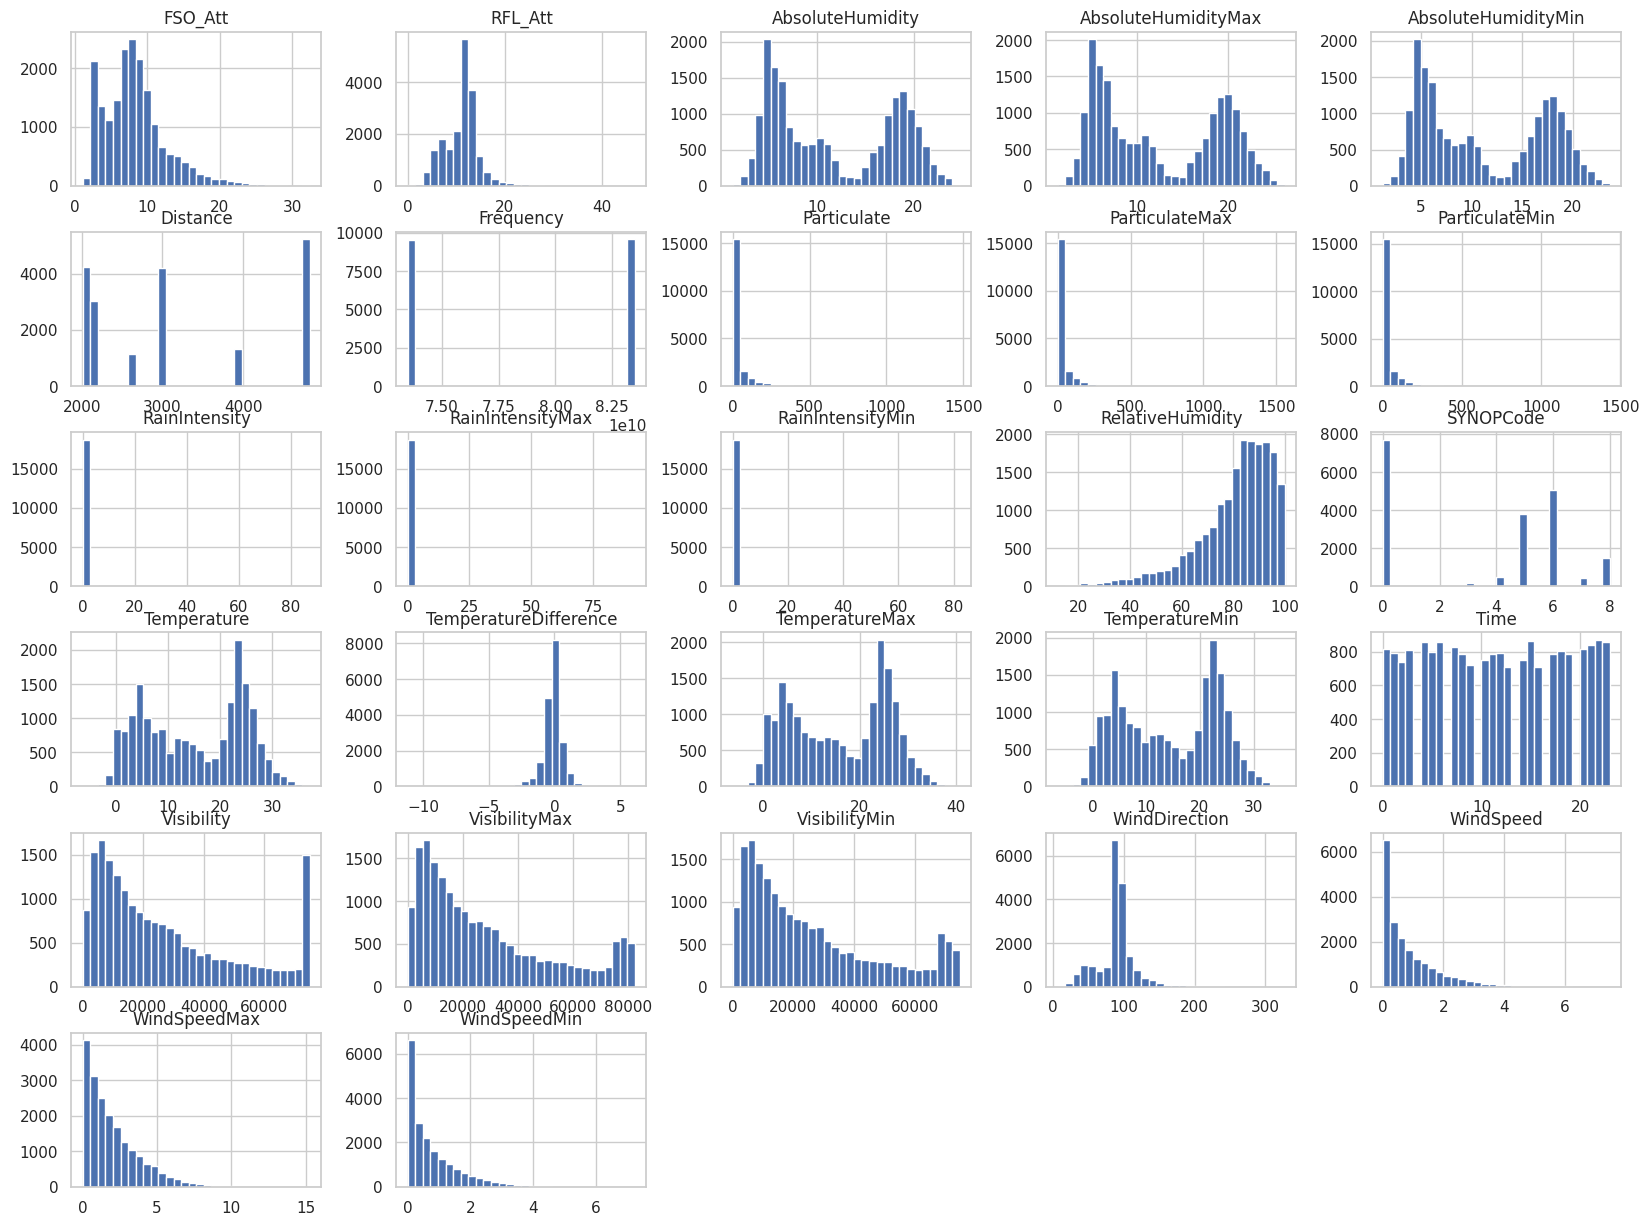

In [7]:
# 4. Distribution of  Features
downsampled_df.hist(bins=30, figsize=(20,15))
plt.show()


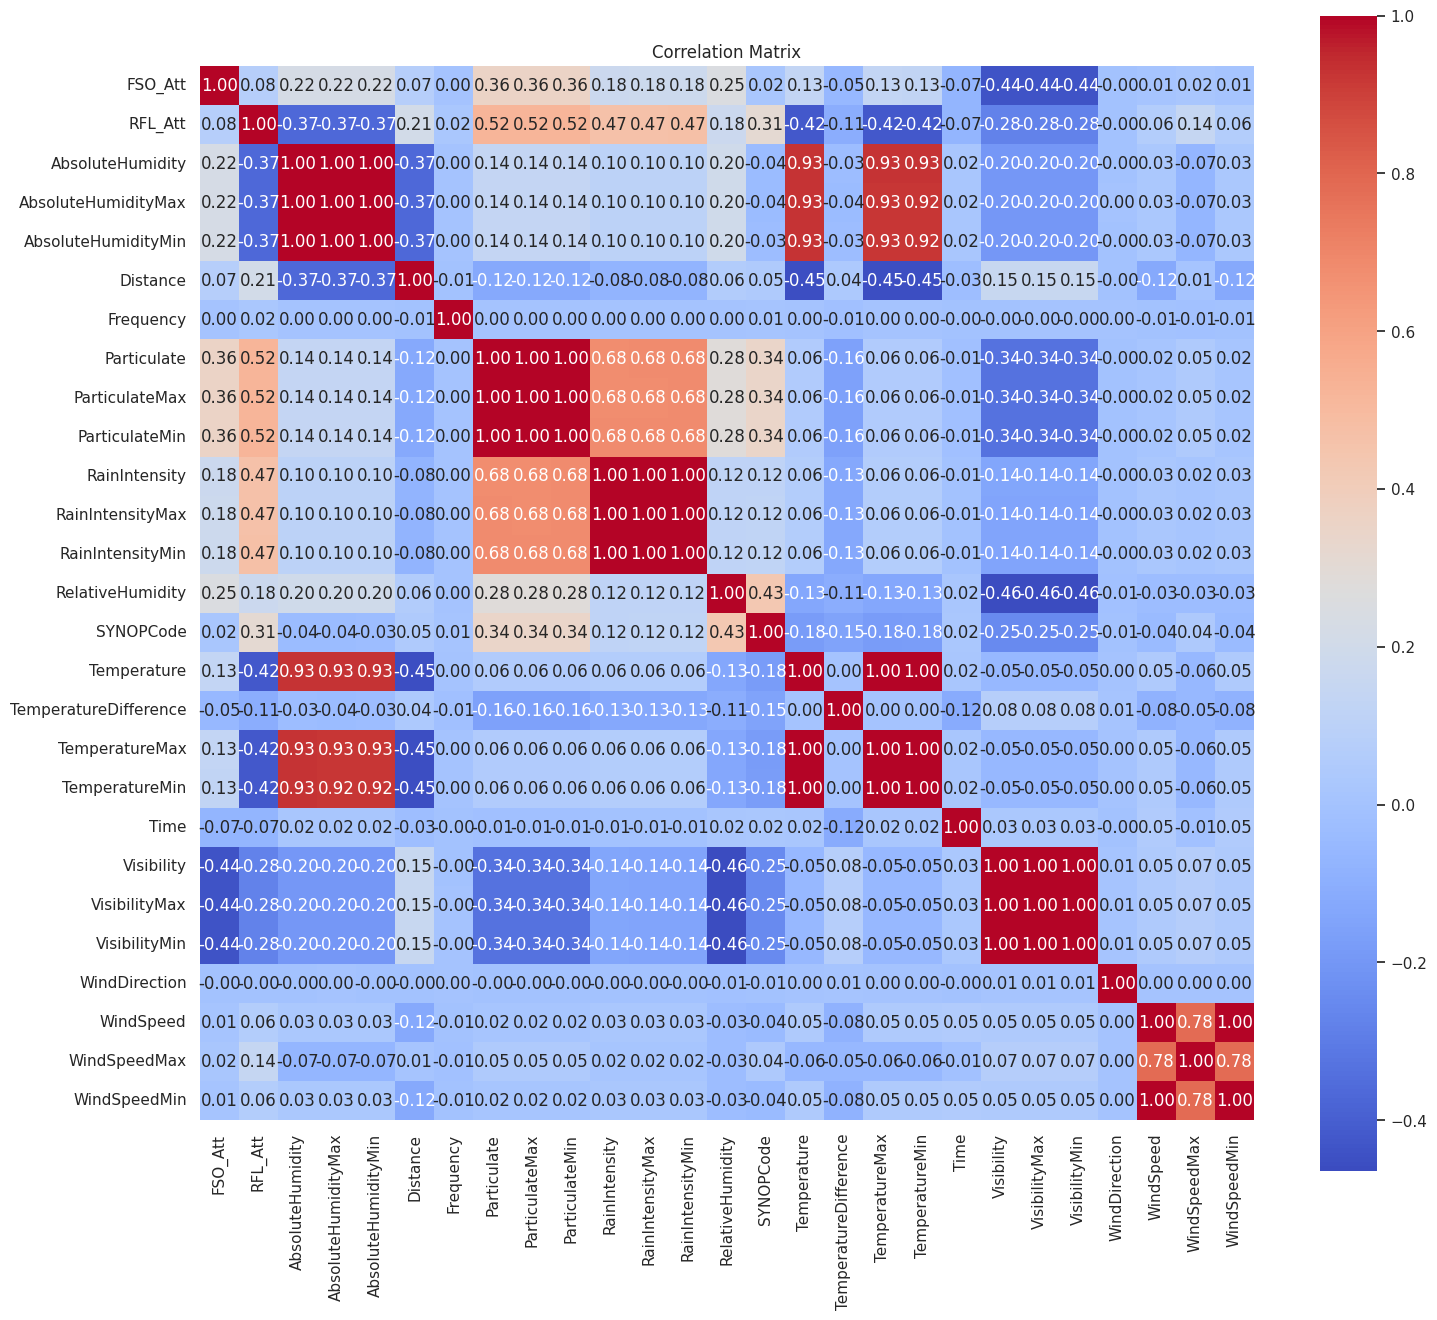

In [8]:
# 5. Correlation Matrix
plt.figure(figsize=(17, 15))
correlation_matrix = downsampled_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

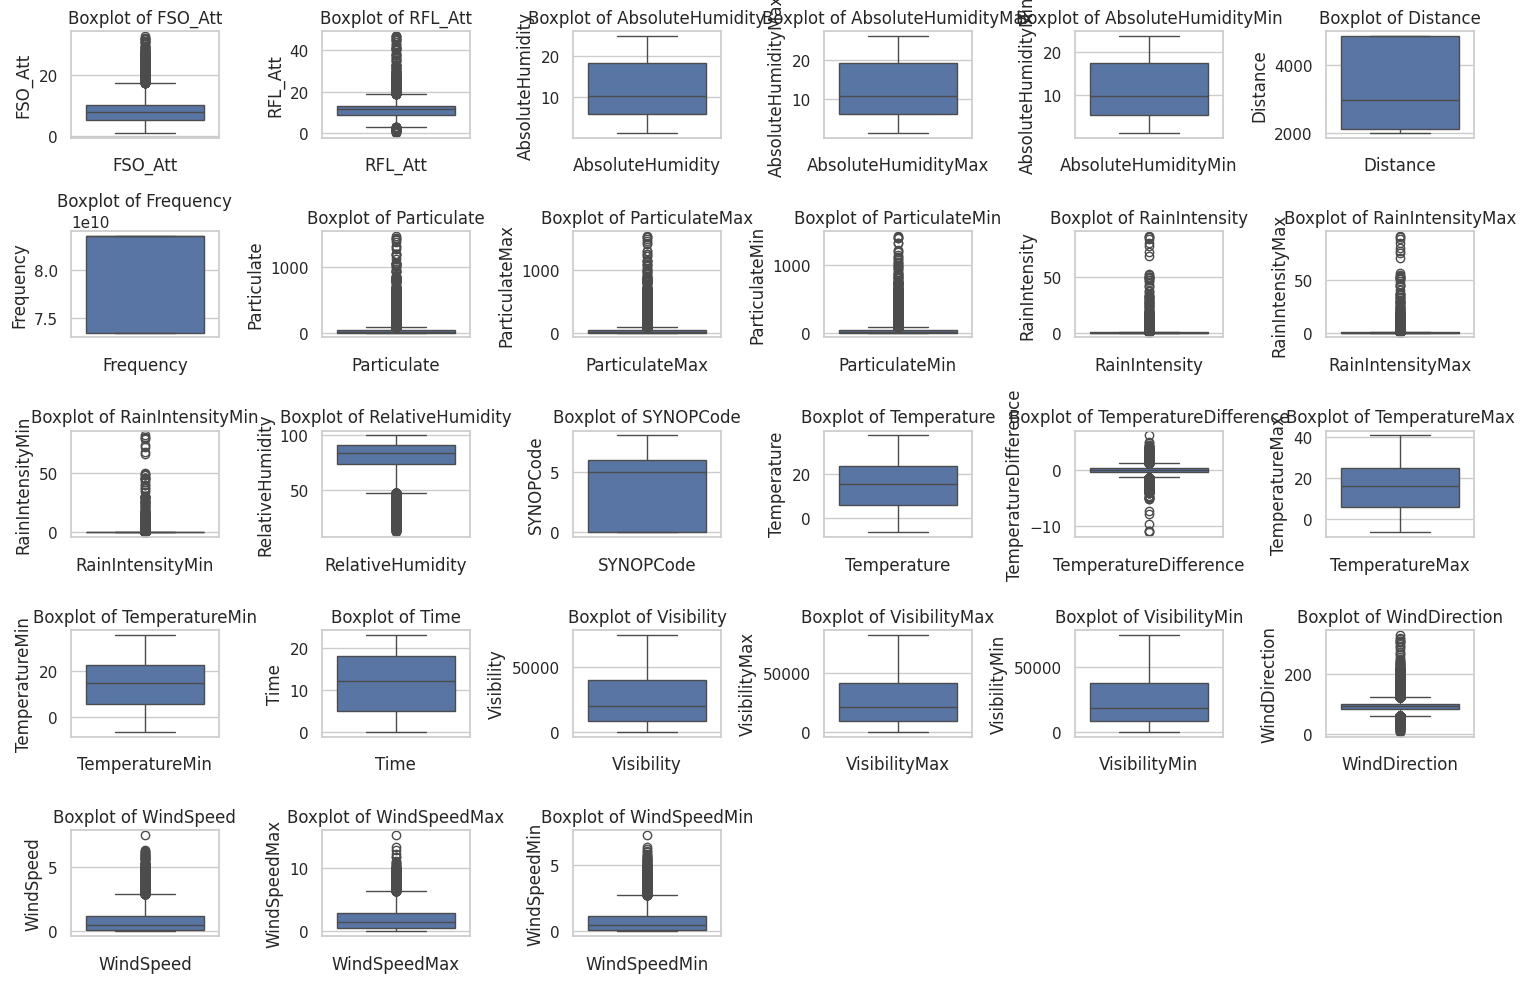

In [9]:
# 6.Boxplots to check for outliers
num_cols = downsampled_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 6, i)  # Adjust the subplot grid size according to the number of columns
    sns.boxplot(y=col, data=downsampled_df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

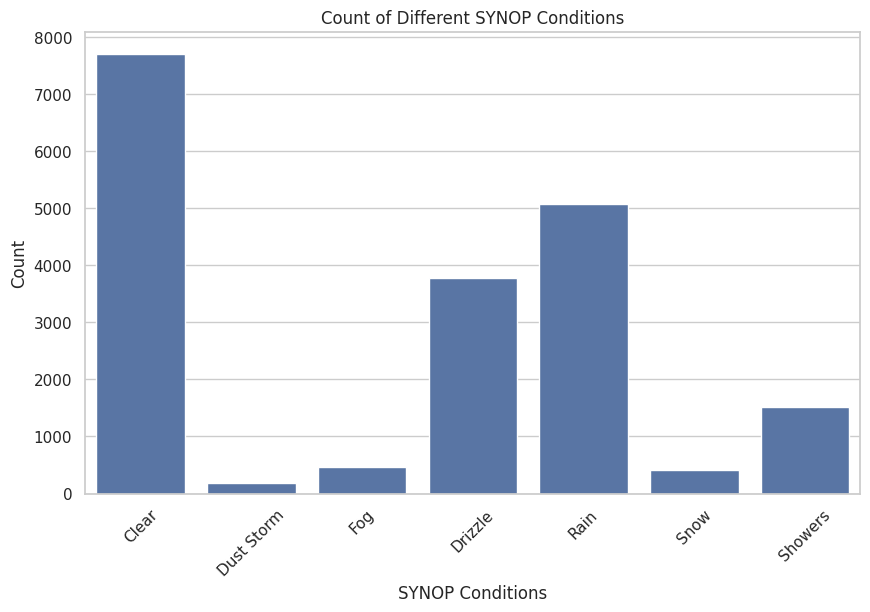

In [10]:
# Sample mapping for SYNOP codes to descriptions
synop_mapping = {
    0: 'Clear',
    3: 'Dust Storm',
    4: 'Fog',
    5: 'Drizzle',
    6: 'Rain',
    7: 'Snow',
    8: 'Showers'
}

# Countplot for SYNOPCode with labels
if 'SYNOPCode' in downsampled_df.columns:
    plt.figure(figsize=(10, 6))

    # Create a count plot with mapped labels
    sns.countplot(x='SYNOPCode', data=downsampled_df,
                  order=synop_mapping.keys())  # Ensures the order of the SYNOPCodes

    # Replace x-tick labels with the descriptive names
    plt.xticks(ticks=range(len(synop_mapping)), labels=synop_mapping.values(), rotation=45)

    plt.title('Count of Different SYNOP Conditions')
    plt.xlabel('SYNOP Conditions')
    plt.ylabel('Count')
    plt.show()